In [1]:
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras import regularizers
from sklearn import datasets

import matplotlib.pyplot as plt
import numpy as np

import cv2

import time

from imageutils import block_dct
from imageutils import dataset_transform_block_dct

import random

Using TensorFlow backend.


In [2]:
def show_2d(im, figsize_x=3, cmap='Greys'):
    plt.figure(figsize=(figsize_x, figsize_x))
    plt.imshow(im, cmap=cmap)
    plt.show()

In [3]:
def show_flattened(im, figsize_x=3, cmap='Greys'):
    im = im.reshape(28,28)
    show_2d(im, figsize_x, cmap)

In [4]:
def diagnose(im):
    pred = model.predict(im, batch_size=1)
    print('Predicted {0}'.format(pred.argmax(axis=1)))
    show_flattened(im)

In [5]:
def stopwatch(value, fmt_string='{days}d:{hours}h:{minutes}m:{seconds}s'):
    '''From seconds to Days;Hours:Minutes;Seconds'''

    valueD = (((value/365)/24)/60)
    days = int (valueD)

    valueH = (valueD-days)*365
    hours = int(valueH)

    valueM = (valueH - hours)*24
    minutes = int(valueM)

    valueS = (valueM - minutes)*60
    seconds = int(valueS)
    data = {'days': days, 'hours': hours, 'minutes': minutes, 'seconds':seconds}


    print (fmt_string.format(**data))

In [6]:
print('[INFO] loading MNIST full dataset...')
dataset = datasets.fetch_mldata("MNIST Original")

[INFO] loading MNIST full dataset...


In [7]:
print(len(dataset))
print(dataset.data.shape)
print(dataset.data.__class__)

4
(70000, 784)
<class 'numpy.ndarray'>


In [8]:
# Traditional NNet setup, linearize the image
data = dataset.data.astype("float") / 255.0
(trainX, testX, trainY, testY) = train_test_split(data, dataset.target, test_size=0.25)

In [9]:
print(data.shape)
print(trainX.shape)
print(testX.shape)


(70000, 784)
(52500, 784)
(17500, 784)


In [10]:
# Transform labels from int to one-hot vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.fit_transform(testY)

print(trainY.shape)
print(testY.shape)

print(lb.classes_)
print(lb.classes_.shape)

(52500, 10)
(17500, 10)
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
(10,)


In [14]:
# define 784-256-128-10 architecture with Keras
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
# define 784-256-128-10 architecture with Keras
model = Sequential()
model.add(Dense(128, input_shape=(784,), activation="relu",
          activity_regularizer=regularizers.l2(1e-6)))
model.add(Dropout(0.1))
model.add(Dense(32, activation="relu",
          activity_regularizer=regularizers.l2(1e-6)))
model.add(Dropout(0.1))
model.add(Dense(10, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [375]:
# Simple CNN architecture with Keras
model = Sequential()
model.add(Conv2D(input_shape=(28,28,1), filters=16, padding='same', 
                 use_bias=True, kernel_size=(5,5), strides=2))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, use_bias=True, kernel_size=(2,2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Conv2D(filters=32, use_bias=False, kernel_size=(2,2)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Flatten())
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
from kerasutils import describe_model

describe_model(model)

Layer 0: <class 'keras.layers.core.Dense'>
    input=(None, 784)
    output=(None, 256)
    act=<function relu at 0x7f07f66c4a60>
Layer 1: <class 'keras.layers.core.Dense'>
    input=(None, 256)
    output=(None, 128)
    act=<function relu at 0x7f07f66c4a60>
Layer 2: <class 'keras.layers.core.Dense'>
    input=(None, 128)
    output=(None, 10)
    act=<function softmax at 0x7f07f66c47b8>


In [15]:
start = time.time()
n_epochs = 20
batch_size = 128
H = model.fit(trainX, trainY, validation_data=(testX, testY), 
              epochs=n_epochs, batch_size=batch_size)
print('Done!!!')
end = time.time()
stopwatch(end-start)

Train on 52500 samples, validate on 17500 samples
Epoch 1/20
52500/52500 [==============================] - 2s 47us/step - loss: 0.3368 - acc: 0.9016 - val_loss: 0.1421 - val_acc: 0.9579
Epoch 2/20
52500/52500 [==============================] - 2s 41us/step - loss: 0.1333 - acc: 0.9600 - val_loss: 0.1077 - val_acc: 0.9661
Epoch 3/20
52500/52500 [==============================] - 2s 41us/step - loss: 0.0928 - acc: 0.9721 - val_loss: 0.0869 - val_acc: 0.9723
Epoch 4/20
52500/52500 [==============================] - 2s 41us/step - loss: 0.0702 - acc: 0.9787 - val_loss: 0.0739 - val_acc: 0.9774
Epoch 5/20
52500/52500 [==============================] - 2s 41us/step - loss: 0.0561 - acc: 0.9821 - val_loss: 0.0724 - val_acc: 0.9789
Epoch 6/20
52500/52500 [==============================] - 2s 41us/step - loss: 0.0471 - acc: 0.9849 - val_loss: 0.0765 - val_acc: 0.9783
Epoch 7/20
52500/52500 [==============================] - 2s 41us/step - loss: 0.0381 - acc: 0.9878 - val_loss: 0.0669 - val_acc

In [16]:
# Evaluate TEST model class prediction accuracy
print("[INFO] Evaluating network...")
predictions = model.predict(testX, batch_size=batch_size)
print(classification_report(testY.argmax(axis=1),
                            predictions.argmax(axis=1),
                            target_names=[str(x) for x in lb.classes_]))

[INFO] Evaluating network...
             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      1680
        1.0       0.99      0.99      0.99      1962
        2.0       0.95      0.99      0.97      1710
        3.0       0.99      0.96      0.98      1799
        4.0       0.98      0.98      0.98      1726
        5.0       0.99      0.97      0.98      1582
        6.0       0.98      0.99      0.99      1735
        7.0       0.97      0.99      0.98      1838
        8.0       0.98      0.97      0.97      1689
        9.0       0.98      0.97      0.97      1779

avg / total       0.98      0.98      0.98     17500



In [17]:
# Evaluate TRAIN model class prediction accuracy
print("[INFO] Evaluating network...")
in_sample_classes = model.predict(trainX, batch_size=batch_size)
print(classification_report(trainY.argmax(axis=1),
                            in_sample_classes.argmax(axis=1),
                            target_names=[str(x) for x in lb.classes_]))

[INFO] Evaluating network...
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      5223
        1.0       1.00      1.00      1.00      5915
        2.0       1.00      1.00      1.00      5280
        3.0       1.00      0.99      1.00      5342
        4.0       1.00      1.00      1.00      5098
        5.0       1.00      1.00      1.00      4731
        6.0       1.00      1.00      1.00      5141
        7.0       0.99      1.00      1.00      5455
        8.0       1.00      1.00      1.00      5136
        9.0       1.00      1.00      1.00      5179

avg / total       1.00      1.00      1.00     52500



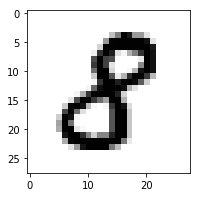

8.0


In [19]:
idx = random.randint(0, data.shape[0])
show_2d(data[idx,:].reshape((28,28)))
print(dataset.target[idx])


In [20]:
target_names=[str(x) for x in lb.classes_]
target_digits = testY.argmax(axis=1)
prediction_digits = predictions.argmax(axis=1)
misses = target_digits != prediction_digits
miss_indices = [index for index,val in enumerate(misses) if val == True]

print(target_digits.shape)
print(prediction_digits.shape)
print(len([val for val in misses if val == True]))
print(len(miss_indices))
print(miss_indices[0:30])



(17500,)
(17500,)
351
351
[24, 59, 63, 137, 251, 296, 449, 492, 514, 549, 570, 574, 576, 588, 642, 811, 815, 829, 848, 1024, 1078, 1103, 1227, 1301, 1359, 1465, 1499, 1503, 1509, 1532]


(23100, 28, 28, 1)
6621
(28, 28, 1)
[0.002 0.    0.009 0.    0.    0.    0.    0.989 0.    0.   ]
Target = 2.0, Prediction=7.0


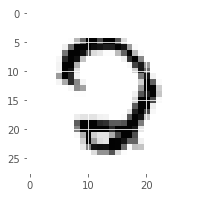

In [394]:
# Show examples of mis-classified digits from the test set
print(testX.shape)
idx = miss_indices[random.randint(0,len(miss_indices))]
im = testX[idx,:]
print(idx)
print(im.shape)
print(np.round(predictions[idx,:],3))
digit = testY[idx].argmax()
print('Target = {}, Prediction={}'.format(target_names[digit], target_names[prediction_digits[idx]]))
#diagnose(im)
show_flattened(im)

(23100, 28, 28, 1)
15584
(28, 28, 1)
Target = 4.0, Prediction=4.0


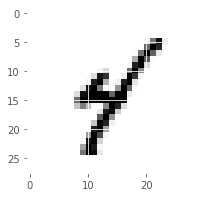

In [387]:
# Show random test digits with predict/target values.  
print(testX.shape)
idx = random.randint(0,testY.shape[0])
im = testX[idx,:]
print(idx)
print(im.shape)
digit = testY[idx].argmax()
print('Target = {}, Prediction={}'.format(target_names[digit], target_names[prediction_digits[idx]]))
#diagnose(im)
show_flattened(im)

In [143]:
plt.style.use('ggplot')
plt.figure()


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>